# Matplotlib Imshow

To show an image in matplotlib, first read it in using `plt.imread()`, then display it with `plt.imshow()`. 

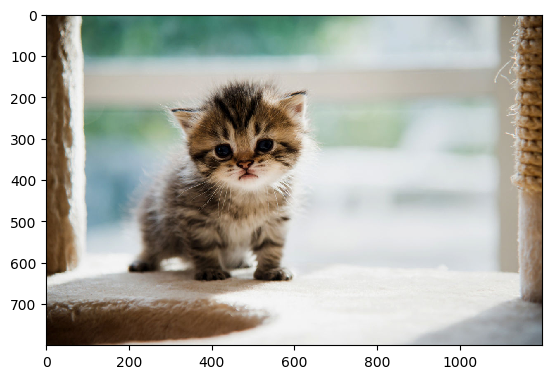

In [3]:
import matplotlib.pyplot as plt

cat_img = plt.imread('Figures/cat.jpeg')
plt.imshow(cat_img)

To turn the (annoying) axis ticks off, call `plt.axis('off')`. 

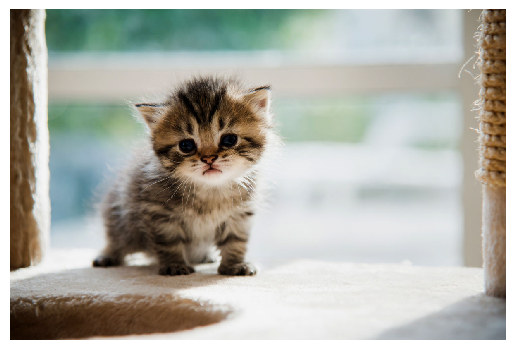

In [4]:
cat_img = plt.imread('Figures/cat.jpeg')
plt.axis('off')
plt.imshow(cat_img)

Much better! But there is a lot more you can do than just show images. Let's look at how this works in more detail.

## Matplotlib Imshow Example

When you display an in image in matplotlib, there are 2 steps you need to take: first you read the image and then you show it. 

You read in the image using `plt.imread()` and pass it a string. I have the images stored in a directory called *Figures*, so I first write `Figures/` followed by the name of the image with its file extension - `cat.jpeg`. If your images are stored in your current working directory, you can omit `Figures/`. 

I store the output of `plt.imread()` in a variable with a descriptive name because you need to pass this to `plt.imshow()`. So, the first line is `cat_img = plt.imread('Figures/cat.jpeg')`.

Images are made up of pixels and each pixel is a dot of color. The cat image is 1200x800 pixels. When an image is loaded into a computer, it is saved as an array of numbers. Each pixel in a color image is made up of a Red, Green and Blue (RGB) part. It can take any value between 0 and 255 with 0 being the darkest and 255 being the brightest. In a grayscale image, each pixel is represented by just a single number between 0 and 1. If a pixel is 0, it is completely black, if it is 1 it is completely white. Everything in between is a shade of gray.

So, if the cat image was black and white, it would be a 2D numpy array with shape `(800, 1200)`. As it is a color image, it is in fact a 3D numpy array (to represent the three different color channels) with shape `(800, 1200, 3)`. 

Note that Numpy writes image sizes is the opposite way to matplotlib and the 'real world'. Numpy is from the world of mathematics and matrices where you always write the number of rows (height) first followed by the columns (width). Matplotlib bases its image functions on the 'real world' and so displays the width first followed by the height.

Let's look at the type and size of `cat_img`.

In [58]:
cat_img = plt.imread('Figures/cat.jpeg')

print(type(cat_img))
# <class 'numpy.ndarray'>

print(cat_img.shape)
# (800, 1200, 3)

<class 'numpy.ndarray'>
(800, 1200, 3)


Once you've read your image into a numpy array, it's time to display it using `plt.imshow()`. This is similar to `plt.show()` which you call at the end of any matplotlib plot. However, unlike `plt.show()`, you must pass the image you want to display as an argument. This is helpful if you have read in multiple images but only want to display a certain number of them.

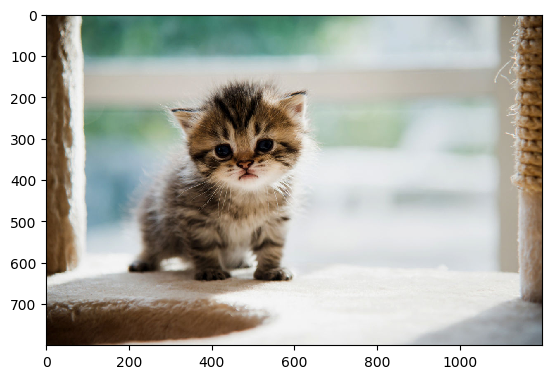

In [6]:
plt.imshow(cat_img)

I'm not sure why but, by default, all images are shown with axis ticks and labels. This can be quite annoying, so call `plt.axis('off')` to remove them. 

However, ticks and labels can be helpful if you only want to select part of the image. By using them as guides, I'll slice `cat_img` to just get the head of our cute kitten.

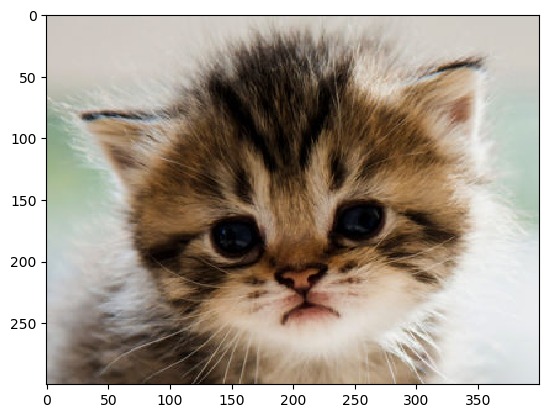

In [9]:
# Slicing found by using axis ticks and lables on image above
cat_head = cat_img[150:450, 275:675, :]
plt.imshow(cat_head)

The above image is a jpeg but you can also display other types of image files such as pngs.

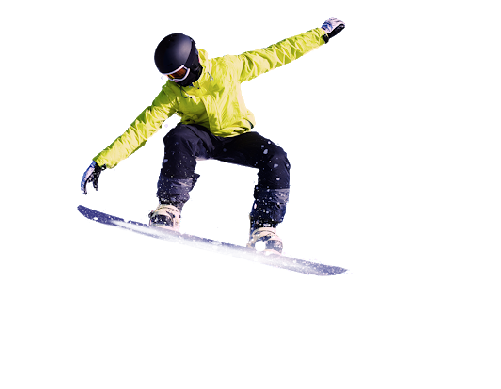

In [54]:
# A png image
snow_img = plt.imread('Figures/snowboarder.png')
plt.axis('off')
plt.imshow(snow_img)

You can display gifs but it is slightly more complicated to do so and so is outside the scope of this article. If you read in and show a gif using the above steps, matplotlib will just show one of its frames.

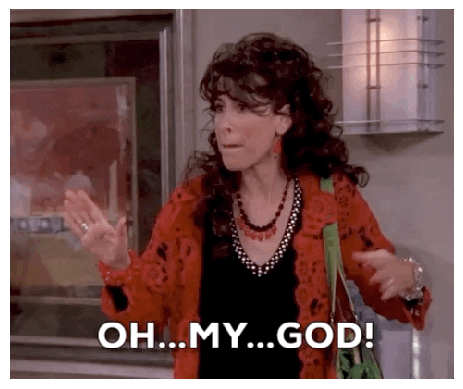

In [37]:
janice = plt.imread('Figures/janice.gif')
plt.axis('off')
plt.imshow(janice)

## Matplotlib Imshow Grayscale

You can turn any color image into a grayscale image in matplotlib. Since grayscale images are 2D numpy arrays, use slicing to turn your 3D array into a 2D one.

In [18]:
cat_img = plt.imread('Figures/cat.jpeg')

# Turn 3D array into 2D by selecting just one of the three dimensions
grayscale_cat = cat_img[:, :, 0]

If you write `cat_img[:, :, 1]` or `cat_img[:, :, 2]` you will get different arrays but the final image will still look the same. This is because grayscale images just care about the relative difference of intensity between each pixel and this is the same over each RGB channel. 

Let's plot it and see what happens. 

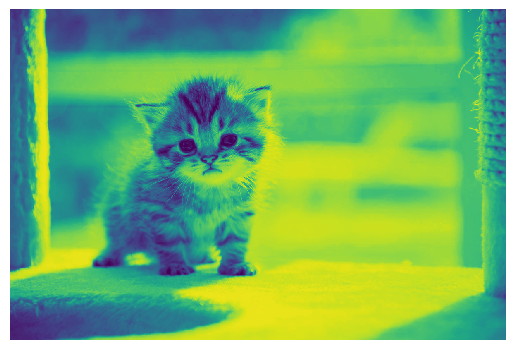

In [55]:
plt.axis('off')
plt.imshow(grayscale_cat)

Wait, what? 

Don't worry, you haven't done anything wrong! You created a grayscale image but matplotlib applied a colormap to it automatically. This happens even if you pick the second or third dimension in your `grayscale_cat` definition.

To make it grayscale, set the `cmap` keyword argument to `'gray'` in `plt.imshow()`.

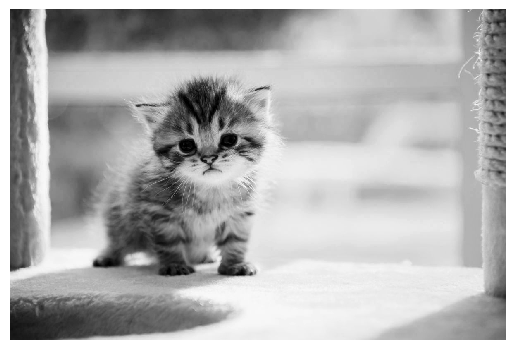

In [28]:
plt.axis('off')
plt.imshow(grayscale_cat, cmap='gray')

Perfect! Now you can easily turn any color image into a grayscale one in matplotlib. But there are many more colors you can choose from. Let's look at all the colormaps in detail.

## Matplotlib Imshow Colormap

There are [many different colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) you can apply to your images. Simply pass the name to the `cmap` keyword argument in `plt.imshow()` and you're good to go. I recommend you play around with them since most of the names won't mean anything to you on first reading. 

The default colormap is *viridis*. Let's explicitly apply it to our cat image.

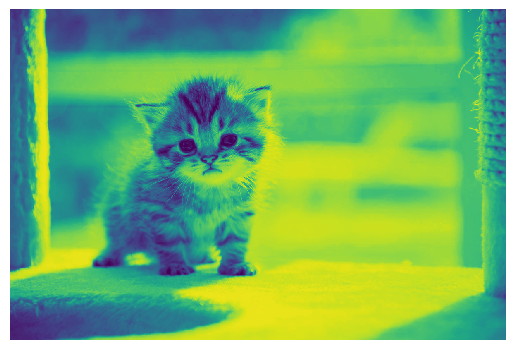

In [11]:
# Turn cat_img into a 2D numpy array 
colored_cat = cat_img[:, :, 0]
plt.axis('off')
plt.imshow(colored_cat, cmap='viridis')

I could write a whole article on colormaps - in fact, the creator of Seaborn [did](https://seaborn.pydata.org/tutorial/color_palettes.html). It's a fascinating topic. Choosing the right one can make your plot incredible and choosing a bad one can ruin it. 

For beginners, matplotlib recommends the `Perceptually Uniform Sequential` colormaps as they work well and are easy on the eyes. Here's a list of them all.

```python
percp_uniform_seq_cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
```
You've already seen `viridis`, so let's display the others on a 2x2 grid (if you don't know [how to make subplots in matplotlib](http://blog.finxter.com/matplotlib-subplots) check out my article).

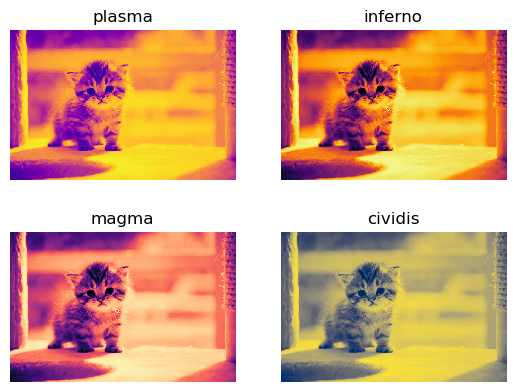

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
cmaps = ['plasma', 'inferno', 'magma', 'cividis']

for ax, cmap in zip(axes.flat, cmaps):
    ax.imshow(colored_cat, cmap=cmap)
    ax.set(title=cmap)
    ax.axis('off')
plt.show()

The colormaps are quite similar and easy to look at. They don't distort the image and the highs and lows can still be seen.

Here are some other colormaps I've randomly chosen. Note how odd some of them are, especially `flag`!

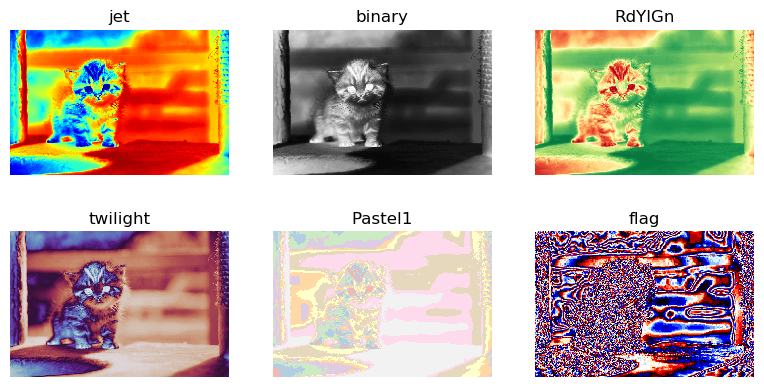

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=plt.figaspect(1/2))
cmaps = ['jet', 'binary', 'RdYlGn', 'twilight', 'Pastel1', 'flag']

for ax, cmap in zip(axes.flat, cmaps):
    ax.imshow(colored_cat, cmap=cmap, label=cmap)
    ax.set(title=cmap)
    ax.axis('off')
plt.show()

## Matplotlib Imshow Colorbar

If your image has a colormap applied to it, you may want to tell the reader what each color means by providing a colorbar. Use `plt.colorbar()` to add one.

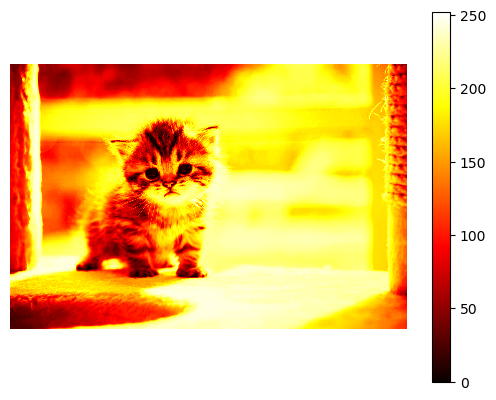

In [50]:
plt.imshow(colored_cat, cmap='hot')
plt.axis('off')
plt.colorbar()

Remember that every value in an array representing a colored image is a number between 0 and 255 and so the colorbar reflects this.

Note that I called `plt.imshow()` on the first line. Unlike `plt.show()`, you can modify images after calling `plt.imshow()` and the changes will be applied to the output.

## Matplotlib Imshow Size

As with every [`Figure` in matplotlib](https://blog.finxter.com/matplotlib-subplots/#Matplotlib_Figures_and_Axes), you can manually set the `Figure`'s size. Simply call `plt.figure()` at the top and set the `figsize` argument. You can either set it to a specific size in inches or set the aspect ratio:
1. `plt.figure(figsize=(8, 6))` - 8 inches wide, 6 inches tall
2. `plt.figure(figsize=plt.figaspect(2))` - aspect ratio of 2, i.e. twice as tall as it is wide. 

Note: the default figsize can be found by calling `plt.rcParams['figure.figsize']` and is `(6.4, 4.8)` inches. 

Let's see what happens when we modify the `Figure` size of our cat image,

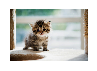

In [14]:
# 1 inch wide x 1 inch tall...?
plt.figure(figsize=(1, 1))

cat_img = plt.imread('Figures/cat.jpeg')
plt.axis('off')
plt.imshow(cat_img)

This is certainly smaller than the original. But it doesn't look like it is 1x1 inches - it's clearly wider that it is tall. But it looks like one of the sides is correct which is better than nothing. 

Let's try to make it 1 inch wide and 3 inches tall. 

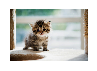

In [15]:
# 1 inch wide x 3 inches tall...?
plt.figure(figsize=(1, 3))

cat_img = plt.imread('Figures/cat.jpeg')
plt.axis('off')
plt.imshow(cat_img)

Now the image hasn't changed at all. What's going on? 

When you resize images in most programs like Microsoft Word or Google Sheets, they maintain their original height/width ratios. This is called preserving the aspect ratio of the image and is usually a very good thing. It ensures that pixels in the image are not distorted when you resize them. This is also the default behavior in matplotlib.

If you actually want to distort the image and to fill up the entire space available in the `Figure`, change the `aspect` keyword argument in `plt.imshow()`. 

There are only two possible values for `aspect`:
1. 'equal' - (default) preserves the aspect ratio, i.e. the side lengths of the pixels are equal (square)
2. 'auto' - does not preserve the aspect ratio

Let's look at the same examples as above but set `aspect='auto'`. 

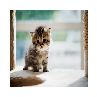

In [16]:
# 1 inch wide x 1 inch tall (definitely)
plt.figure(figsize=(1, 1))

cat_img = plt.imread('Figures/cat.jpeg')
plt.axis('off')
plt.imshow(cat_img, aspect='auto')

Great! Now, the image is clearly 1x1 inches but it has come at the expense of slight image distortion.

Let's distort it even further. 

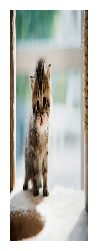

In [17]:
# 1 inch wide x 3 inches tall (definitely)
plt.figure(figsize=(1, 3))

cat_img = plt.imread('Figures/cat.jpeg')
plt.axis('off')
plt.imshow(cat_img, aspect='auto')

Perfect! Clearly the image is distorted but now you know how to do it.

Note the default aspect value can be changed for all images by setting `plt.rcParams['image.aspect'] = 'auto'`.

## Summary

Now you know the basics of displaying images with matplotlib. 

You understand why you need to first read images in from a file and store them as a numpy array before displaying them with `plt.imshow()`. You know how to read in different types of image files (hint - if it's a still image, it's the same process regardless of the file type!).

If you want to set a specific colormap, you use the `cmap` keyword argument and you can also turn your color image to a grayscale one. Finally, you can add a colorbar and change the size of your image to be anything you want. 

There are some more advanced topics to learn about such as interpolation, adding legends and using log scales for your axes but I'll leave them for another article. 

## Where To Go From Here?

Do you wish you could be a programmer full-time but don’t know how to start?

Check out the pure value-packed webinar where Chris - creator of Finxter.com - teaches you to become a Python freelancer in 60 days or your money back!

https://tinyurl.com/become-a-python-freelancer

It doesn’t matter if you’re a Python novice or Python pro. If you are not making six figures/year with Python right now, you will learn something from this webinar. 

These are proven, no-BS methods that get you results fast.

This webinar won’t be online forever. Click the link below before the seats fill up and learn how to become a Python freelancer, guaranteed.

https://tinyurl.com/become-a-python-freelancer